In [1]:
import pandas as pd
import yfinance as yf
import quantstats as qs
from monteprediction import SPDR_ETFS

In [11]:
# data = yf.download(SPDR_ETFS, start='1990-01-01', end='2024-09-09', interval="1d")
data = yf.download(SPDR_ETFS, start='2018-06-20', end='2024-09-09', interval="1d")
prices = data['Adj Close']
prices.describe()

[*********************100%***********************]  11 of 11 completed


Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
count,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1562.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000
mean,68.526272,60.488263,59.368294,30.647599,88.109818,127.828251,62.339058,35.027877,58.316736,112.375275,145.882830
std,14.615894,13.211452,20.196198,6.300964,18.482874,44.950341,10.023124,5.110885,7.870462,21.973161,29.393380
min,35.217167,37.117779,19.554544,16.270903,45.608612,54.535416,42.091999,22.063257,39.278381,69.818069,84.119637
25%,52.654346,48.464146,44.987047,24.648757,71.000191,83.643345,53.322657,31.433609,52.392051,90.438223,116.682993
50%,73.826660,57.747293,52.006870,31.639627,91.438358,129.747612,65.052143,34.860338,59.433050,120.201263,147.651199
75%,80.367247,71.759462,80.123640,35.366488,99.518948,155.991123,70.792662,38.486662,63.991050,129.424431,172.003719
max,94.279999,87.790001,97.298637,45.740002,131.460007,237.679993,83.480003,47.533112,76.830002,157.199997,206.589020


In [12]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1564 entries, 2018-06-20 00:00:00+00:00 to 2024-09-06 00:00:00+00:00
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XLB     1564 non-null   float64
 1   XLC     1564 non-null   float64
 2   XLE     1564 non-null   float64
 3   XLF     1564 non-null   float64
 4   XLI     1564 non-null   float64
 5   XLK     1562 non-null   float64
 6   XLP     1564 non-null   float64
 7   XLRE    1564 non-null   float64
 8   XLU     1564 non-null   float64
 9   XLV     1564 non-null   float64
 10  XLY     1564 non-null   float64
dtypes: float64(11)
memory usage: 146.6 KB


In [13]:
new_prices = prices.drop(['XLC','XLRE'],axis=1)
new_prices = prices.dropna()
returns = new_prices.pct_change().dropna()
returns

Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-06-21 00:00:00+00:00,-0.010635,-0.006129,-0.018516,-0.002933,-0.012555,-0.007684,0.001956,0.005967,0.003384,-0.005762,-0.007123
2018-06-22 00:00:00+00:00,0.014563,0.004376,0.019951,-0.004779,0.003455,-0.003238,0.008202,0.008742,0.006944,0.004494,-0.001704
2018-06-25 00:00:00+00:00,-0.015550,-0.020598,-0.020094,-0.010713,-0.012671,-0.020763,0.005036,-0.002476,0.016552,-0.009184,-0.021739
2018-06-26 00:00:00+00:00,0.003819,0.001658,0.012629,-0.003361,0.003766,0.004038,-0.004240,0.005275,0.001163,-0.003090,0.007162
2018-06-27 00:00:00+00:00,-0.003112,-0.008722,0.013410,-0.012364,-0.008060,-0.013647,-0.002129,-0.002778,0.004840,-0.008463,-0.012947
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-28 00:00:00+00:00,-0.004294,-0.006629,-0.006420,0.002455,-0.000464,-0.013798,-0.004236,-0.003452,0.000000,0.001157,-0.009682
2024-08-29 00:00:00+00:00,0.005499,-0.002071,0.013033,0.008907,0.007046,-0.009024,-0.004984,-0.003926,0.005444,0.002118,0.001195
2024-08-30 00:00:00+00:00,0.010937,0.006687,0.003739,0.009490,0.010687,0.013291,0.007940,0.009738,0.007528,0.006918,0.015081


In [14]:
returns.index = returns.index.tz_convert(None)
mean_returns = returns.mean(axis=1)
mean_returns

Date
2018-06-21   -0.005457
2018-06-22    0.005546
2018-06-25   -0.010200
2018-06-26    0.002620
2018-06-27   -0.004906
                ...   
2024-08-28   -0.004124
2024-08-29    0.002112
2024-08-30    0.009276
2024-09-03   -0.013559
2024-09-06   -0.017418
Length: 1561, dtype: float64

[*********************100%***********************]  1 of 1 completed


/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2018-06-22   2018-06-22
End Period                 2024-09-06   2024-09-06
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          97.04%       100.06%
CAGR﹪                     7.83%        8.01%

Sharpe                     0.65         0.68
Prob. Sharpe Ratio         94.4%        95.08%
Smart Sharpe               0.56         0.58
Sortino                    0.9          0.94
Smart Sortino              0.77         0.81
Sortino/√2                 0.64         0.67
Smart Sortino/√2           0.55         0.57
Omega                      1.14         1.14

Max Drawdown               -34.1%       -36.34%
Longest DD Days            745          479
Volatility (ann.)          20.06%       19.37%
R^2                        0.94         0.94
Information Ratio          0.0          0.0
Calmar              

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-23,2020-11-06,261,-36.344043,-31.194426
2,2022-03-30,2022-10-12,2023-07-21,479,-19.186662,-18.379166
3,2018-09-24,2018-12-24,2019-04-03,192,-17.698618,-14.374285
4,2023-08-01,2023-10-27,2023-12-12,134,-10.312798,-9.457225
5,2022-01-05,2022-02-23,2022-03-28,83,-8.911232,-8.279683


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


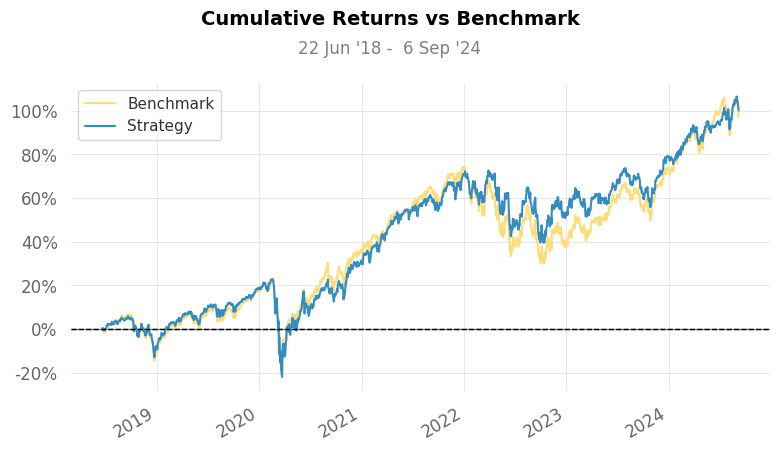

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


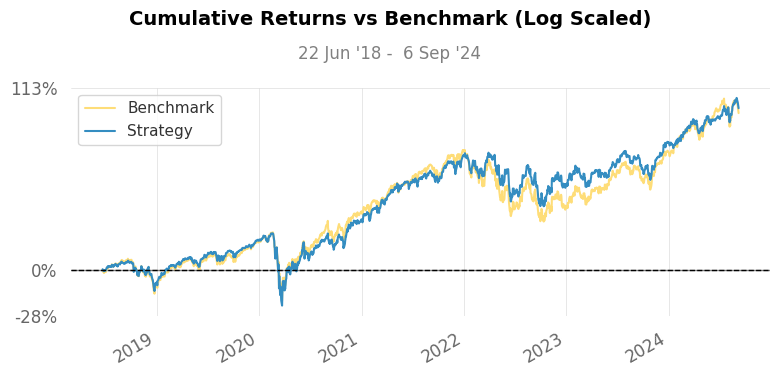

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


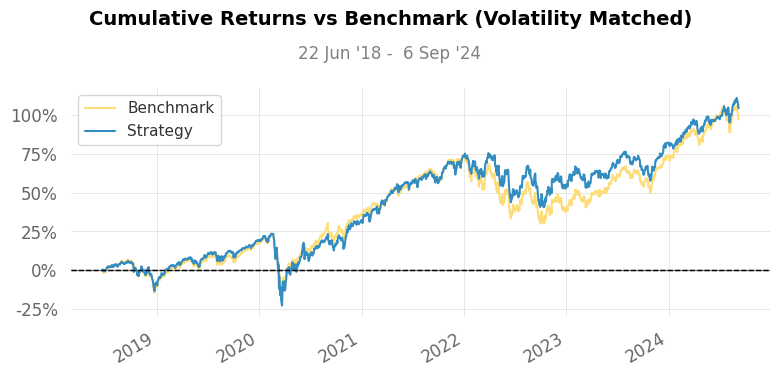

/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/quantstats/_plotting/wrappers.py:555: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("A")
/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/quantstats/_plotting/wrappers.py:557: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("A")
/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/quantstats/_plotting/wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/quantstats/_plotting/wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()
findfont: Font family 'Arial' not found.
findfont: Font 

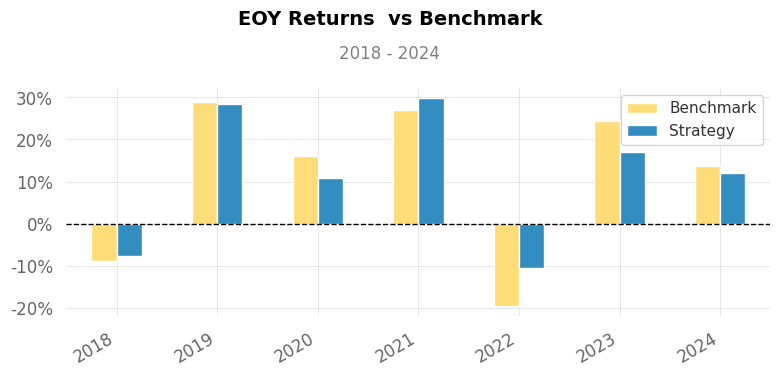

/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/quantstats/_plotting/core.py:433: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample)
/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/quantstats/_plotting/core.py:435: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample)
/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/quantstats/_plotting/core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial

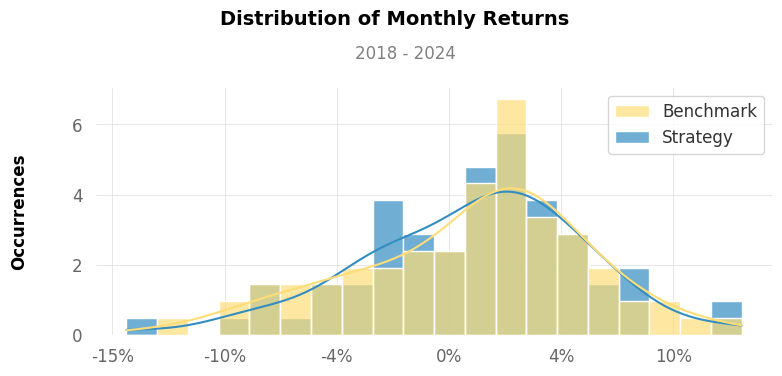

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


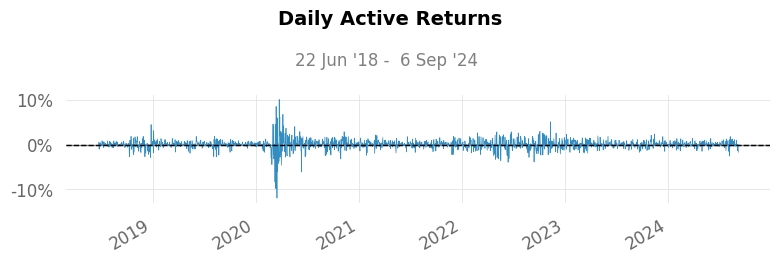

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


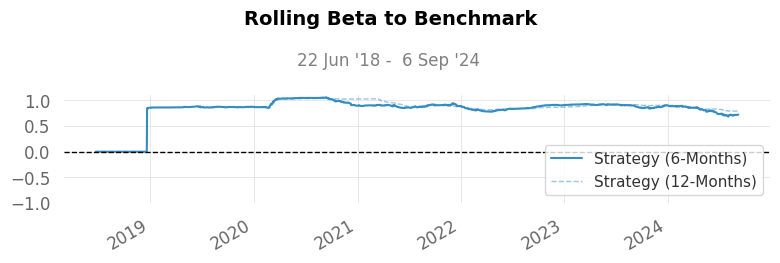

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


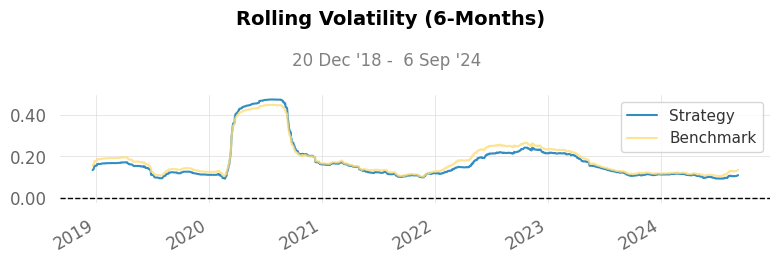

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


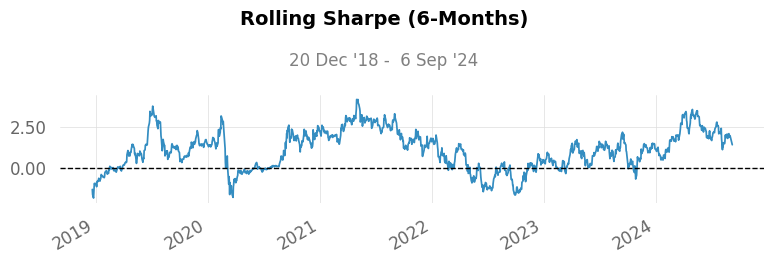

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


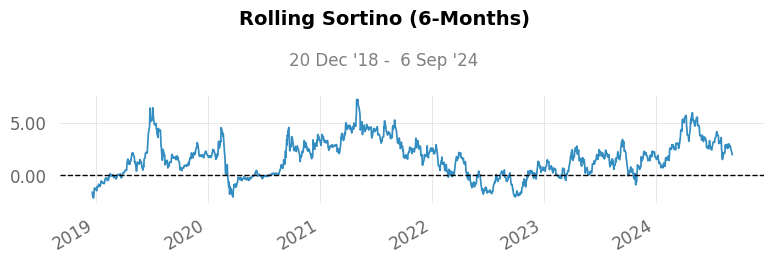

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


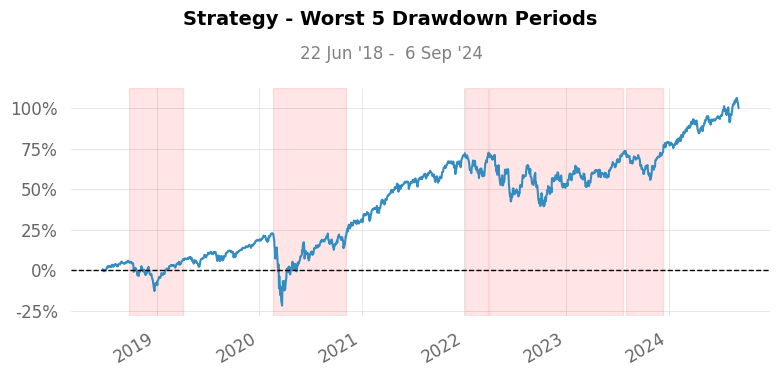

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


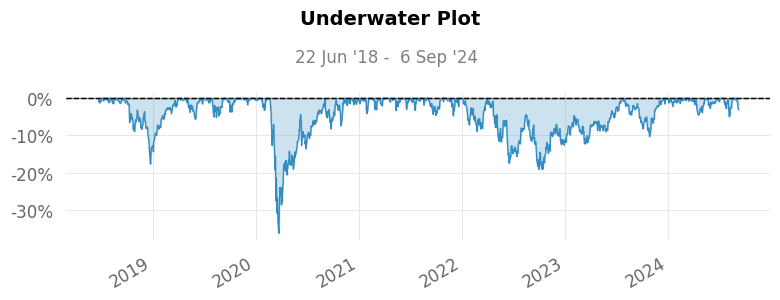

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


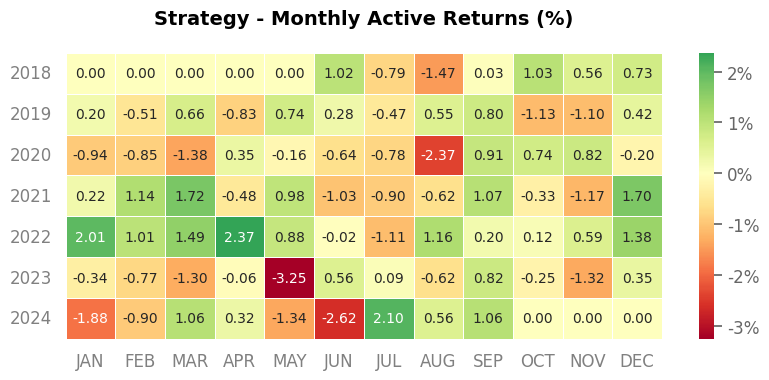

/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/quantstats/_plotting/core.py:1016: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/quantstats/_plotting/core.py:1018: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  port["Monthly"] = port["Daily"].resample("M").apply(apply_fnc)
/home/fcelaya/strats-experiments/venv/lib/python3.10/site-packages/quantstats/_plot

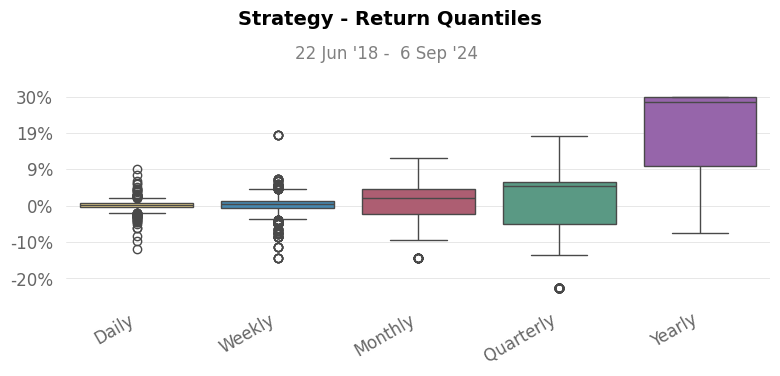

In [15]:
qs.reports.full(mean_returns,'SPY')